In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

np.random.seed(42)

#  Генератор случайных чисел для равномерного распределения на [0,1]

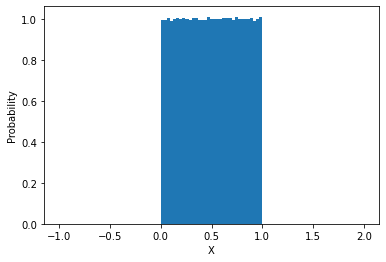

In [2]:
uniform = np.random.uniform(size=1_000_000)

bins = np.linspace(-1, 2, 100)

plt.hist(uniform, bins, density=True)
plt.ylabel('Probability')
plt.xlabel('X');

# Генератор случайных чисел для закона распределения, заданного непрерывной функцией распределения

In [3]:
from scipy.optimize import newton

# Inversion method (https://web.mit.edu/urban_or_book/www/book/chapter7/7.1.3.html)
def generate_from_distribution(f_distr, size):
    
    # генерируем ряд значений [0,1]
    values = np.random.uniform(size=size)
    
    # для каждого значения T численно ищем точку x, в которой значение функции
    # распределения совпадает с значением Т 
    return [newton(lambda x: f_distr(x) - value, value, tol = 1e-5, maxiter=100) for value in values]

#### Нормальное распределение

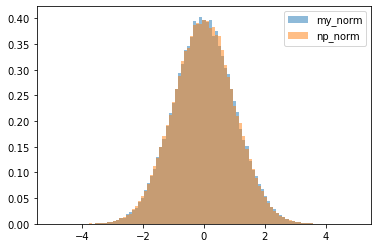

In [4]:
from scipy.stats import norm

size = 100_000

my_norm = generate_from_distribution(norm.cdf, size)
np_norm = np.random.normal(size=size)

bins = np.linspace(-5, 5, 100)

plt.hist(my_norm, bins, alpha=0.5, density=True, label='my_norm')
plt.hist(np_norm, bins, alpha=0.5, density=True, label='np_norm')
plt.legend(loc='upper right')
plt.show()

#### Показательное распределение

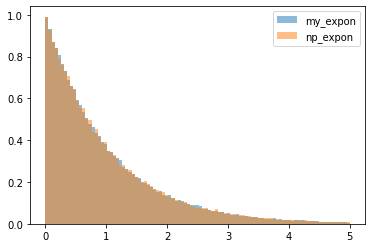

In [5]:
from scipy.stats import expon

size = 100_000

my_expon = generate_from_distribution(expon.cdf, size)
np_expon = np.random.exponential(size=size)

bins = np.linspace(0, 5, 100)

plt.hist(my_expon, bins, alpha=0.5, density=True, label='my_expon')
plt.hist(np_expon, bins, alpha=0.5, density=True, label='np_expon')
plt.legend(loc='upper right')
plt.show()

#### Гамма-распределение

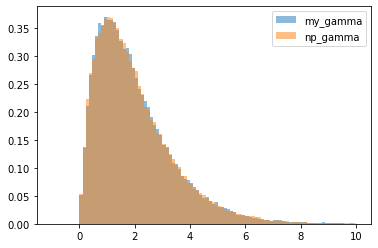

In [6]:
from scipy.stats import gamma

size = 100_000
shape = 2.0

my_gamma = generate_from_distribution(lambda x: gamma.cdf(x, shape), size)
np_gamma = np.random.gamma(shape, size=size)

bins = np.linspace(-1, 10, 100)

plt.hist(my_gamma, bins, alpha=0.5, density=True, label='my_gamma')
plt.hist(np_gamma, bins, alpha=0.5, density=True, label='np_gamma')
plt.legend(loc='upper right')
plt.show()


#### Распределение Стьюдента

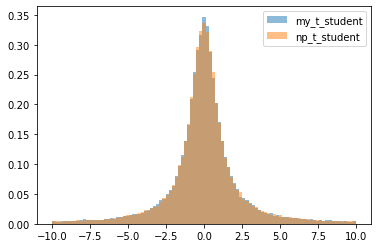

In [7]:
from scipy.stats import t

size = 100_000
df = 1.0

my_t_student = generate_from_distribution(lambda x: t.cdf(x, df), size)
np_t_student = np.random.standard_t(df, size=size)

bins = np.linspace(-10, 10, 100)

plt.hist(my_t_student, bins, alpha=0.5, density=True, label='my_t_student')
plt.hist(np_t_student, bins, alpha=0.5, density=True, label='np_t_student')
plt.legend(loc='upper right')
plt.show()

# Генератор случайных чисел для дискретного распределения с конечным числом значений

#### Биномиальное распределение

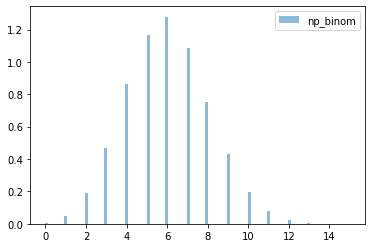

In [8]:
size = 100_000
n = 20
p = 0.3

np_binom = np.random.binomial(n, p, size=size)

bins = np.linspace(0, 15, 100)

plt.hist(np_binom, bins, alpha=0.5, density=True, label='np_binom')
plt.legend(loc='upper right')
plt.show()

#### Распределение Бернулли

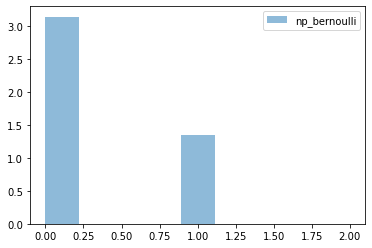

In [9]:
size = 100_000
p = 0.3

np_bernoulli = np.random.binomial(1, p, size=size)

bins = np.linspace(0, 2, 10)

plt.hist(np_bernoulli, bins, alpha=0.5, density=True, label='np_bernoulli')
plt.legend(loc='upper right')
plt.show()

# Генератор случайных чисел для дискретного распределения со счетным числом значений

#### Пуассоновское распределение

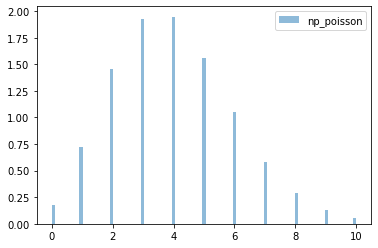

In [10]:
size = 100_000
lam = 4

np_poisson = np.random.poisson(lam, size=size)

bins = np.linspace(0, 10, 100)

plt.hist(np_poisson, bins, alpha=0.5, density=True, label='np_poisson')
plt.legend(loc='upper right')
plt.show()

#### Геометрическое распределение

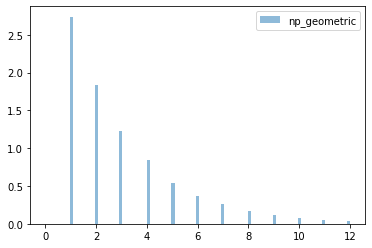

In [11]:
size = 100_000
p = 0.33

np_geometric = np.random.geometric(p, size=size)

bins = np.linspace(0, 12, 100)

plt.hist(np_geometric, bins, alpha=0.5, density=True, label='np_geometric')
plt.legend(loc='upper right')
plt.show()

# Вычисление основных выборочных характеристик

В качестве данных будем использовать информацию о количестве заболеваний/смертей в US:

In [12]:
df = pd.read_csv('data/countries-aggregated_csv.csv',parse_dates=True,index_col=0)
df = df[df['Country'] == 'US'][['Confirmed', 'Deaths']]
df.tail()

,Confirmed,Deaths
Date,,
2021-09-27,43116877,690435
2021-09-28,43226482,692592
2021-09-29,43349749,695123
2021-09-30,43460343,697851
2021-10-01,43618627,700285


#### Выбросим первые 3 месяца данных и перейдем к процентным изменениям показателей относительно прошлого дня:

In [13]:
df = df[90:]
df = df.pct_change().dropna()
df = df * 100.0
df

,Confirmed,Deaths
Date,,
2020-04-22,3.522660,5.188620
2020-04-23,3.892299,4.856886
2020-04-24,3.643498,4.143047
2020-04-25,3.302244,3.148973
2020-04-26,2.796281,2.502125
...,...,...
2021-09-27,0.430953,0.347944
2021-09-28,0.254204,0.312412
2021-09-29,0.285165,0.365439


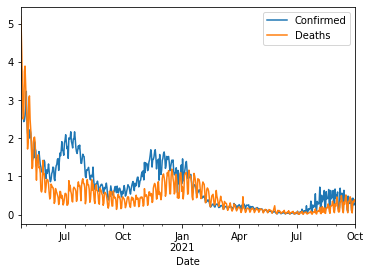

In [14]:
df['Confirmed'].plot()
df['Deaths'].plot()

plt.legend(loc='upper right')
plt.show()

#### Выборочная функция распределения

In [15]:
def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

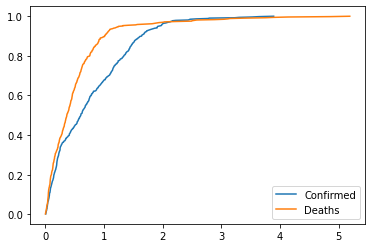

In [16]:
xc, yc = ecdf(df['Confirmed'])
xd, yd = ecdf(df['Deaths'])

plt.plot(xc, yc, label = 'Confirmed')
plt.plot(xd, yd, label = 'Deaths')
plt.legend(loc='lower right')

plt.show()

#### Частота события

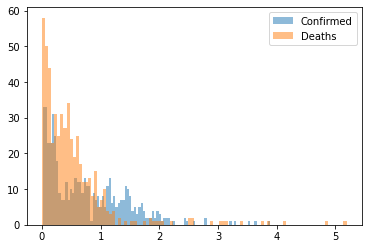

In [17]:
plt.hist(df['Confirmed'], alpha=0.5, bins=100, label='Confirmed')
plt.hist(df['Deaths'], alpha=0.5, bins=100 , label='Deaths')

plt.legend(loc='upper right')

plt.show()

#### Функция плотности

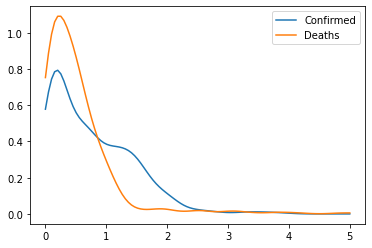

In [18]:
from scipy.stats import gaussian_kde

kde_c = gaussian_kde(df['Confirmed'])
kde_d = gaussian_kde(df['Deaths'])

x_range = np.linspace(0.0, 5.00, 100)

plt.plot(x_range,kde_c(x_range), label='Confirmed')
plt.plot(x_range,kde_d(x_range), label='Deaths')

plt.legend(loc='upper right')

plt.show()


#### Начальные и центральные моменты

In [19]:
labels = ['Confirmed', 'Deaths']

for label in labels:
    for i in range(1, 4):
        print("Central moment[", i,"] for '", label, "' = ", ss.moment(df[label], moment=i))
    for i in range(1, 4):
        print("Initial moment[", i,"] for '", label, "' = ", ss.moment(df[label], moment=i))
    print()

Central moment[ 1 ] for ' Confirmed ' =  0.0
Central moment[ 2 ] for ' Confirmed ' =  0.4411538608081036
Central moment[ 3 ] for ' Confirmed ' =  0.3486829013176267
Initial moment[ 1 ] for ' Confirmed ' =  0.0
Initial moment[ 2 ] for ' Confirmed ' =  0.4411538608081036
Initial moment[ 3 ] for ' Confirmed ' =  0.3486829013176267

Central moment[ 1 ] for ' Deaths ' =  0.0
Central moment[ 2 ] for ' Deaths ' =  0.37929358363811455
Central moment[ 3 ] for ' Deaths ' =  0.8510359414771963
Initial moment[ 1 ] for ' Deaths ' =  0.0
Initial moment[ 2 ] for ' Deaths ' =  0.37929358363811455
Initial moment[ 3 ] for ' Deaths ' =  0.8510359414771963



#### Выборочные средняя, дисперсия, мода, медиана

In [20]:
labels = ['Confirmed', 'Deaths']

for label in labels:
    print("Median for '", label, "' = ", np.median(df[label]))
    print("Mean for '", label, "' = ", df[label].mean())
    print("Std for '", label, "' = ", df[label].std())
    print("Mode for '", label, "' = ", ss.mode(df[label])[0][0])
    print()

Median for ' Confirmed ' =  0.608145852764419
Mean for ' Confirmed ' =  0.7564371974449311
Std for ' Confirmed ' =  0.6648240104781932
Mode for ' Confirmed ' =  0.011125530572608788

Median for ' Deaths ' =  0.3691361034271923
Mean for ' Deaths ' =  0.5121252421284274
Std for ' Deaths ' =  0.6164521926380064
Mode for ' Deaths ' =  0.005106141865085512



#### Aсимметрия, эксцесс

In [21]:
labels = ['Confirmed', 'Deaths']

for label in labels:
    print("Skew for '", label, "' = ", ss.skew(df[label]))
    print("Kurtosis for '", label, "' = ", ss.kurtosis(df[label]))
    print()

Skew for ' Confirmed ' =  1.1899960627212494
Kurtosis for ' Confirmed ' =  1.8391704838894762

Skew for ' Deaths ' =  3.6432137964880646
Kurtosis for ' Deaths ' =  18.10402709297724



#### Квантили, квартили, децили и их выборочные аналоги (порядковые статистики)

In [22]:
labels = ['Confirmed', 'Deaths']
alphas = [0.25, 0.50, 0.75]

for label in labels:
    for alpha in alphas:
        print("Quantile[", alpha, "] for '", label, "' = ", np.quantile(df[label], alpha))
    print()

Quantile[ 0.25 ] for ' Confirmed ' =  0.1974011300303835
Quantile[ 0.5 ] for ' Confirmed ' =  0.608145852764419
Quantile[ 0.75 ] for ' Confirmed ' =  1.1846281656097801

Quantile[ 0.25 ] for ' Deaths ' =  0.13659220365900282
Quantile[ 0.5 ] for ' Deaths ' =  0.3691361034271923
Quantile[ 0.75 ] for ' Deaths ' =  0.6366501674287928



# Асимптотическая нормальность основных выборочных характеристик. Построение серии гистограмм

В качестве выборочной характеристики используется среднее значение

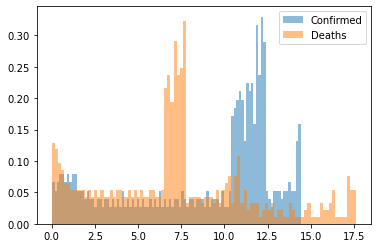

In [23]:
labels = ['Confirmed', 'Deaths']

for label in labels:
    mean = df[label].mean()
    std = df[label].std()
    error = []
    for i in range(1, len(df)):
        error.append(np.sqrt(i) * (df[label][0:i].mean() - mean) / std)
    plt.hist(error, bins = 100, alpha=0.5, density=True, label=label)

plt.legend(loc='upper right')
plt.show()

#### Получившееся распределение совсем не похоже на нормальное, из чего следует вывод о несостоятельности предположения асимптотической нормальности выборочного среднего

#### Для демонстрации дальнейших пунктов давайте построим другое множество, которое по построению будет близким к нормальному. Например, будет брать сумму из N случайных чисел из множества {0, 1} K раз, согласно ЦПТ при достаточно большом К полученное распределение будет стремится к нормальному

In [24]:
def generate_sample(sample_size=1_000_000, limit=100):
    func = lambda x: np.random.randint(0, 2, limit).sum()
    vfunc = np.vectorize(func)
    return np.fromfunction(vfunc, (sample_size,))

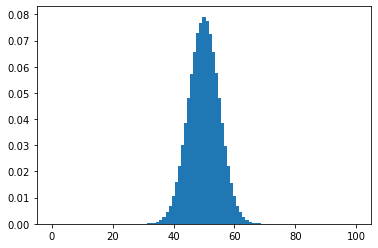

In [25]:
sample = generate_sample()

bins = np.linspace(0.0, 100.0, 100)

plt.hist(sample, density=True, bins=bins)
plt.show()

# Поведение основных выборочных характеристик в нормальной генеральной совокупности

Давайте посмотрим на поведение выборочного среднего для нашего синтетического примера

In [26]:
mean = sample.mean()
std = sample.std()
size = len(sample)

error = []
for i in range(1, size, int(size / 10_000)):
    error.append(np.sqrt(i) * (sample[0:i].mean() - mean) / std)

Видно, что ошибка выборочного среднего уменьшается с увелечением размера выборки

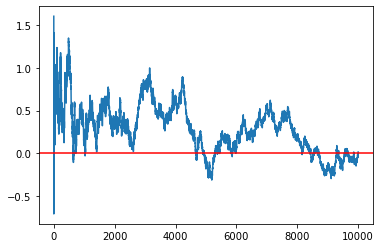

In [27]:
plt.plot(error)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.show()

# Точечные оценки. Несмещенность, состоятельность, эффективность.

В качестве точечной оценки снова выберем выборочное среднее. Мы знаем, что теоретическая оценка среднего равна 50, давайте будем брать выборки по 100 случайных элементов множества, считать выборочное среднее, всего проведем N экспериментов, для каждого будем пересчитывать мат. ожидание нашей оценки и сравнивать его с 50

In [28]:
def mini_samples_mean(sample, mini_sample_size, total_experements):
    means = []
    
    for i in range(0, total_experements):        
        means.append(np.random.choice(sample, mini_sample_size).mean())
        
    return means

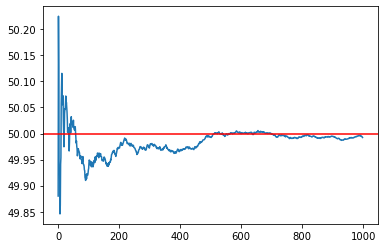

In [39]:
total_experements = 1000

samples_mean = mini_samples_mean(sample, 100, total_experements)
means = []

for i in range(1, total_experements):
    means.append(np.mean(samples_mean[0:i]))
    
plt.plot(means)
plt.axhline(y=50.0, color='r', linestyle='-')
plt.show()

Как мы видим, матожидание действительно стремится к 50, значит наша оценка несмещенная. Теперь докажем состоятельность оценки, увеличивая размер выборки

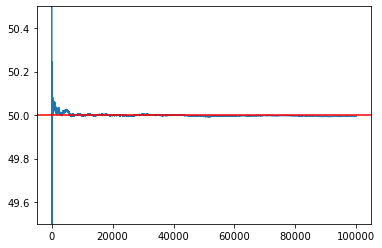

In [30]:
means = []
size = len(sample)

for i in range(1, size, int(size/100_000)):
    means.append(np.mean(sample[0:i]))

plt.plot(means)
plt.axhline(y=50.0, color='r', linestyle='-')
plt.gca().set_ylim([49.50,50.50])
plt.show()
    

Как видно, с увеличением размера выборки точечная оценка стремится к 50, т.е. оценка состоятельна. Докажем эффективность, рассмотрев в качестве альтернативы смещенное геометрическое среднее в качестве оценки

In [40]:
from scipy.stats.mstats import gmean

gmeans = []
means = []
size = len(sample)

for i in range(10, size, int(size/10_000)):
    means.append(np.mean(sample[0:i]))
    gmeans.append(0.25 + gmean(sample[0:i]))

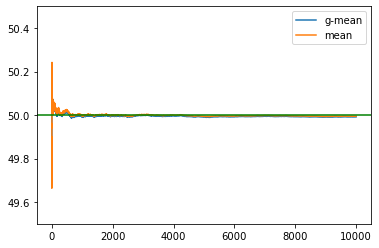

In [41]:
plt.plot(gmeans, label="g-mean")
plt.plot(means, label="mean")
plt.axhline(y=50.0, color='g', linestyle='-')

plt.gca().set_ylim([49.50,50.50])

plt.legend(loc='upper right')
plt.show()

Видно, что выборочное среднее дает значения с меньшим разбросом ошибки, чем у геометрического, значит такая оценка является более эффективной

# Построение доверительных интервалов

с уровнем доверия 0.95 значение среднего лежит в указанном диапазоне (для синтетических данных, и данных по заболеваемости/смертям)

In [33]:
sms.DescrStatsW(sample).tconfint_mean()

(49.98525118230006, 50.00485281769994)

In [34]:
sms.DescrStatsW(df['Deaths']).tconfint_mean()

(0.45942300076889997, 0.5648274834879541)

In [35]:
sms.DescrStatsW(df['Confirmed']).tconfint_mean()

(0.6995995125761469, 0.8132748823137168)